In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
np.random.seed(123)
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'



In [2]:
''' 1. A bank found that the average number of cars waiting during 
the noon hour at a drive-up window follows a Poisson distribution 
with a mean of 2 cars. Make a chart of this distribution and answer 
these questions concerning the probability of cars waiting at the 
drive-up window.

A. What is the probability that no cars drive up in the noon hour?
B. What is the probability that 3 or more cars come through the drive 
through?
C. How likely is it that the drive through gets at least 1 car?'''

' 1. A bank found that the average number of cars waiting during \nthe noon hour at a drive-up window follows a Poisson distribution \nwith a mean of 2 cars. Make a chart of this distribution and answer \nthese questions concerning the probability of cars waiting at the \ndrive-up window.\n\nA. What is the probability that no cars drive up in the noon hour?\nB. What is the probability that 3 or more cars come through the drive \nthrough?\nC. How likely is it that the drive through gets at least 1 car?'

<BarContainer object of 10 artists>

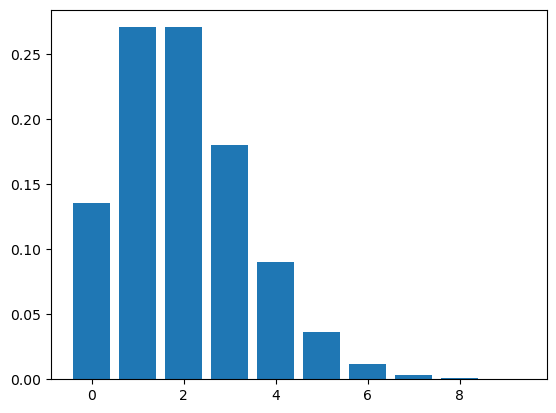

In [3]:
lamda = 2 
x = np.arange(0,10)
y = stats.poisson(lamda).pmf(x)
 
plt.bar(x,y)

In [4]:
# A. 
lamda = 2 
stats.poisson(lamda).pmf(0) 


0.1353352832366127

In [5]:
# B. 
stats.poisson(lamda).sf(2)


0.32332358381693654

In [6]:
# C. 
1- stats.poisson(lamda).pmf(0)


0.8646647167633873

In [7]:
''' 2. Grades of State University graduates are normally distributed 
with a mean of 3.0 and a standard deviation of .3. Calculate the
following:

A. What grade point average is required to be in the top 5% of the
graduating class?
B. What GPA constitutes the bottom 15% of the class?
C. An eccentric alumnus left scholarship money for students in the
third decile from the bottom of their class. Determine the range
of the third decile. Would a student with a 2.8 grade point average
qualify for this scholarship?
D. If I have a GPA of 3.5, what percentile am I in?'''

' 2. Grades of State University graduates are normally distributed \nwith a mean of 3.0 and a standard deviation of .3. Calculate the\nfollowing:\n\nA. What grade point average is required to be in the top 5% of the\ngraduating class?\nB. What GPA constitutes the bottom 15% of the class?\nC. An eccentric alumnus left scholarship money for students in the\nthird decile from the bottom of their class. Determine the range\nof the third decile. Would a student with a 2.8 grade point average\nqualify for this scholarship?\nD. If I have a GPA of 3.5, what percentile am I in?'

In [31]:
mean = 3
std = .3

In [32]:
# A.
gpa = stats.norm(mean, std)
gpa.isf(.05)

3.4934560880854417

In [10]:
# B.
gpa.ppf(.15)

2.689069983151863

In [35]:
# C. 


In [34]:
gpa.ppf((0.2,0.3))

array([2.74751363, 2.84267985])

In [12]:
# D.
1- gpa.cdf(3.5)

0.047790352272814696

In [36]:
gpa.sf(3.5)

0.0477903522728147

In [37]:
gpa.cdf(3.5)

0.9522096477271853

In [13]:
''' 3. A marketing website has an average click-through rate of 2%.
One day they observe 4326 visitors and 97 click-throughs.
How likely is it that this many people or more click through?'''

' 3. A marketing website has an average click-through rate of 2%.\nOne day they observe 4326 visitors and 97 click-throughs.\nHow likely is it that this many people or more click through?'

In [14]:
n = 4326
p = 0.02

stats.binom(n, p).sf(96)

0.13975823631416445

In [38]:
λ = 4326 * .02
λ

86.52

In [39]:
cd = stats.binom(4326, .02)
cd.sf(96)

0.13975823631416445

In [15]:
''' 4. You are working on some statistics homework consisting of 
100 questions where all of the answers are a probability rounded to 
the hundreths place. Looking to save time, you put down random 
probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers
is correct?'''

' 4. You are working on some statistics homework consisting of \n100 questions where all of the answers are a probability rounded to \nthe hundreths place. Looking to save time, you put down random \nprobabilities as the answer to each question.\n\nWhat is the probability that at least one of your first 60 answers\nis correct?'

In [16]:
n_trials = 60

p_success = .01

stats.binom(n_trials, p_success).sf(0)

0.45284335760923855

In [17]:
''' 5. The codeup staff tends to get upset when the
student break area is not cleaned up. Suppose that there's 
a 3% chance that any one student cleans the break area when
they visit it, and, on any given day, about 90% of the 3 active 
cohorts of 22 students visit the break area. 
A. How likely is it that the break area gets cleaned up each day? 
B. How likely is it that it goes two days without getting cleaned up? 
C. All week?'''

" 5. The codeup staff tends to get upset when the\nstudent break area is not cleaned up. Suppose that there's \na 3% chance that any one student cleans the break area when\nthey visit it, and, on any given day, about 90% of the 3 active \ncohorts of 22 students visit the break area. \nA. How likely is it that the break area gets cleaned up each day? \nB. How likely is it that it goes two days without getting cleaned up? \nC. All week?"

In [18]:
n = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n, p).sf(0)

0.8342199288437352

In [19]:
# B.
stats.binom(n * 2, p).pmf(0)

0.027483031992576134

In [20]:
# C.
stats.binom(n * 5, p).pmf(0)


0.00012521651388091245

In [21]:
'''6. You want to get lunch at La Panaderia, but notice that the 
line is usually very long at lunchtime. After several weeks of 
careful observation, you notice that the average number of people
in line when your lunch break starts is normally distributed with
a mean of 15 and standard deviation of 3.

A. If it takes 2 minutes for each person to order, and 10 minutes 
from ordering to getting your food, what is the likelihood that you
have at least 15 minutes left to eat your food before you
have to go back to class?

Assume you haveone hour for lunch, and ignore travel time to and from La Panaderia.'''

'6. You want to get lunch at La Panaderia, but notice that the \nline is usually very long at lunchtime. After several weeks of \ncareful observation, you notice that the average number of people\nin line when your lunch break starts is normally distributed with\na mean of 15 and standard deviation of 3.\n\nA. If it takes 2 minutes for each person to order, and 10 minutes \nfrom ordering to getting your food, what is the likelihood that you\nhave at least 15 minutes left to eat your food before you\nhave to go back to class?\n\nAssume you haveone hour for lunch, and ignore travel time to and from La Panaderia.'

In [22]:
Mean = 15 
std = 3
sim = 1_000_000
trials = 7
clean = 1
noclean = 0
simulation = np.random.choice([clean, noclean], size = (sim, trials), p = [0.03, 0.97])
prob = (simulation.sum(axis = 1) == 1).mean()
prob


0.174974

In [41]:
# 33 minutes
stats.norm(3,15).cdf(33)

0.9772498680518208

In [23]:
'''7. Connect to the employees database and find the average salary
of current employees, along with the standard deviation. For the 
following questions, calculate the answer based on modeling the 
employees salaries with a normal distribution defined by the 
calculated mean and standard deviation then compare this answer to 
the actual values present in the salaries dataset.

A. What percent of employees earn less than 60,000?
B. What percent of employees earn more than 95,000?
C. What percent of employees earn between 65,000 and 80,000?
D. What do the top 5% of employees make?'''

'7. Connect to the employees database and find the average salary\nof current employees, along with the standard deviation. For the \nfollowing questions, calculate the answer based on modeling the \nemployees salaries with a normal distribution defined by the \ncalculated mean and standard deviation then compare this answer to \nthe actual values present in the salaries dataset.\n\nA. What percent of employees earn less than 60,000?\nB. What percent of employees earn more than 95,000?\nC. What percent of employees earn between 65,000 and 80,000?\nD. What do the top 5% of employees make?'

In [24]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [46]:
mean = salaries.salary.mean()
std_dev = salaries.salary.std()
(mean, std_dev)

(72012.23585730705, 17309.99538025198)

In [47]:
# A.
stats.norm(mean, std_dev).cdf(60_000)


0.24385742480214423

In [48]:
# B. 
stats.norm(mean, std_dev).sf(95_000)

0.09208819199804053

In [49]:
# C.
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))


array([0.33506057])

In [29]:
# D.
stats.norm(mean, std_dev).isf(0.05)


100484.64454102777

In [30]:
salaries.salary.quantile(0.95)


104225.84999999998